# Analyze the decision scores of various algorithms

Here we analyze the anomaly scores of various algorithms, by mapping the raw anomaly score (not a probability) as a color onto the time series data. This additionally illustrates how to use the `overlay` feature to nicely show the decisions of an algorithm. 

In [1]:
from dtaianomaly.anomaly_detection import PYODAnomalyDetector, Windowing
from dtaianomaly.visualization import plot_data, plot_anomaly_scores

## Load the data

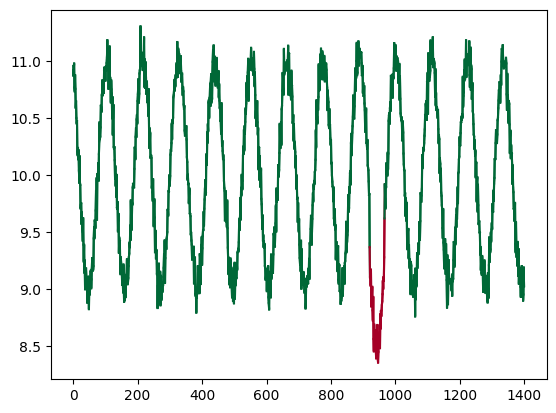

In [2]:
from dtaianomaly.data_management.DataManager import DataManager

data_manager = DataManager('../data')
data_manager.select({'collection_name': 'Demo'})
dataset_index = data_manager.get(0)
trend_data_df = data_manager.load(dataset_index)
trend_data, ground_truth = data_manager.load_raw_data(dataset_index)

plot_data(trend_data_df, show_ground_truth='overlay');

## Analyze the decision scores

We analyze the decision scores of IForest, LOF and OC-SVM for varying window sizes. For all three methods, we see a similar effect of the window size. 
- If the window size is smaller, then the anomaly detector can detect the anomalous interval correctly, but also has an increased anomaly score for non-anomalous intervals (indicated as darker green). 
- By increasing the window size, these non-anomalous are correctly identified as normal. However, this also results in a larger anomalous interval, larger than the anomaly effectively is. 

Something else that is interesting to note, for LOF with window size 16, we see that right in the center of the ground truth anomaly, there is a short interval that is considered normal. This might be because those windows are very similar to each other, resulting in a homogenous area in the feature space. Because of this, LOF does not identify these windows as anomalous. 

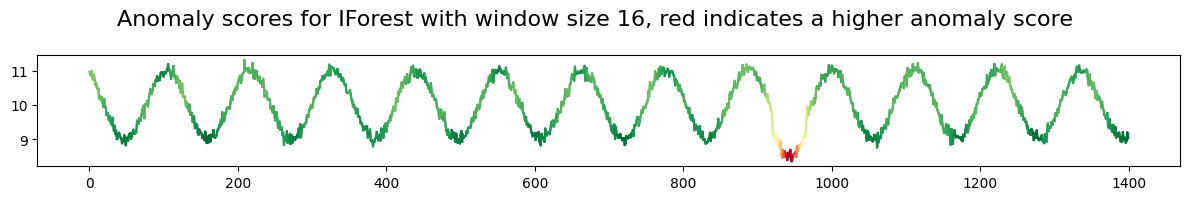

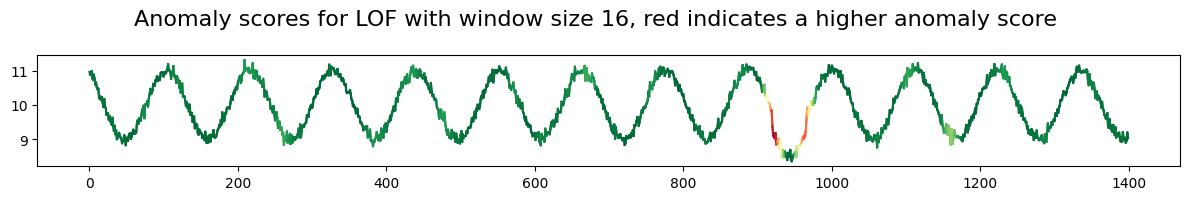

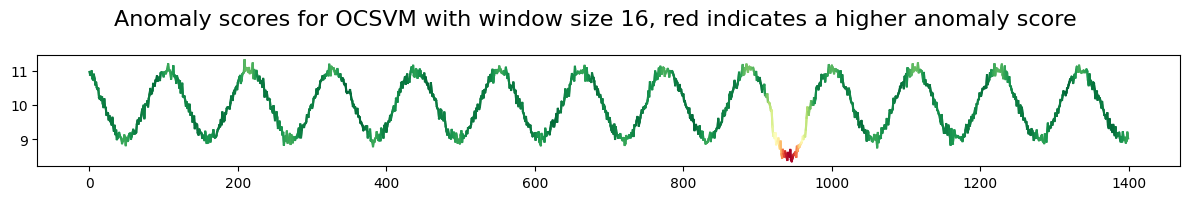

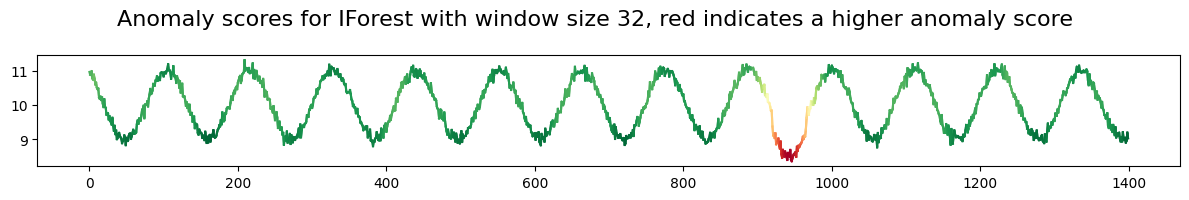

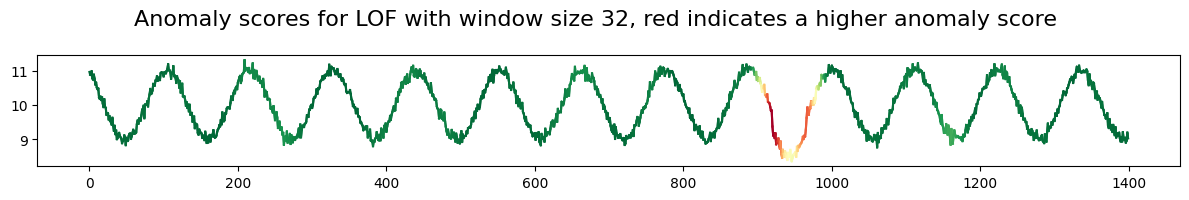

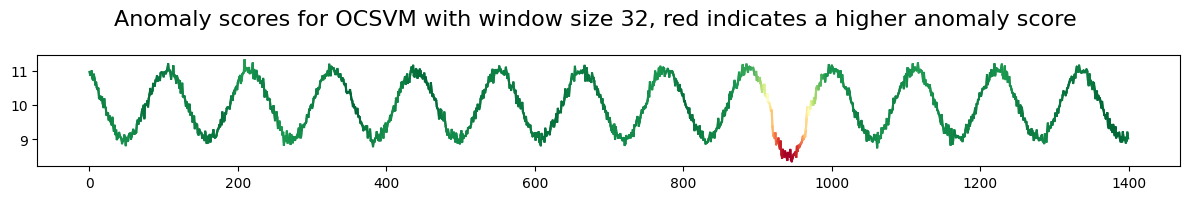

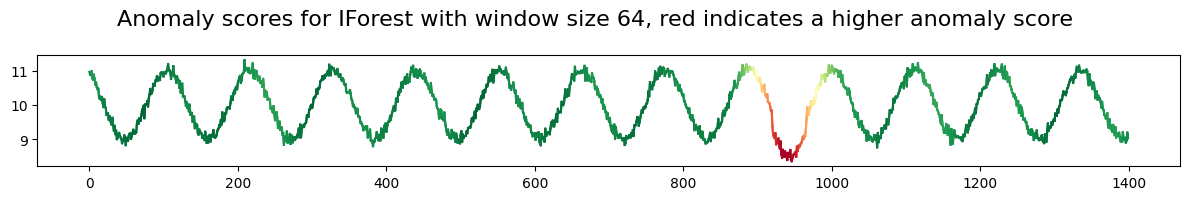

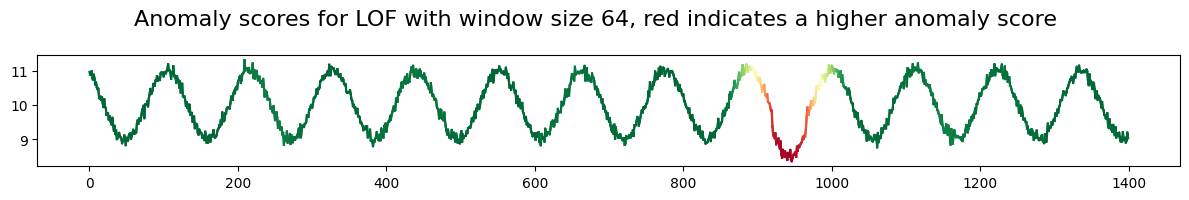

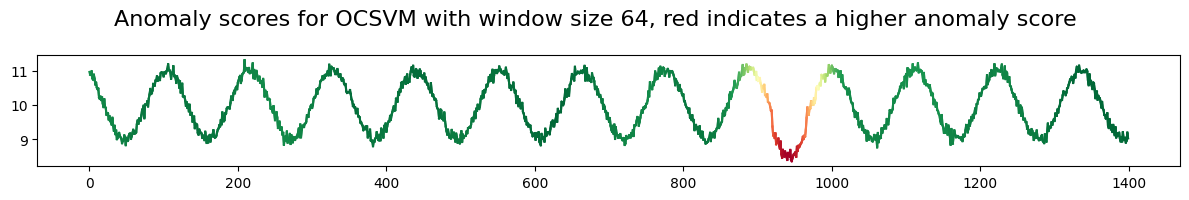

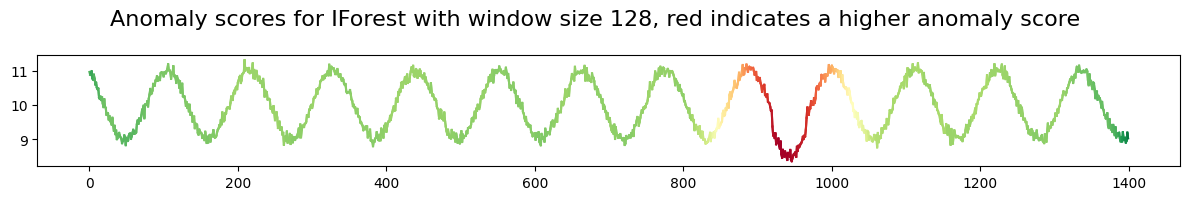

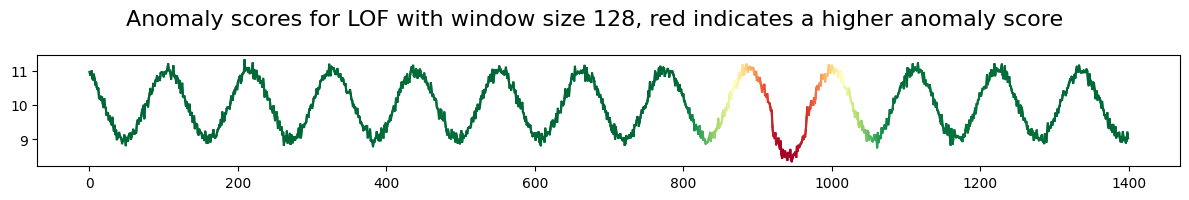

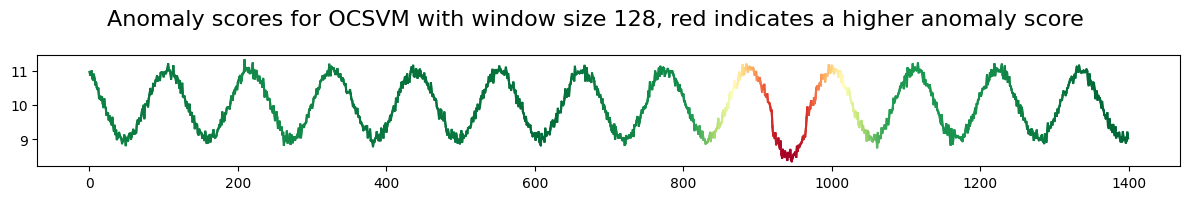

In [4]:
for window_size in [16, 32, 64, 128]:
    for anomaly_detector_name in ['IForest', 'LOF', 'OCSVM']:
        anomaly_detector = PYODAnomalyDetector(anomaly_detector_name, Windowing(window_size))
        anomaly_detector.fit(trend_data)
        fig = plot_anomaly_scores(
            trend_data=trend_data_df,
            anomaly_scores=anomaly_detector.decision_function(trend_data),
            show_anomaly_scores='overlay',
            show_ground_truth=None
        )
        fig.set_size_inches(12, 2)
        fig.suptitle(f'Anomaly scores for {anomaly_detector_name} with window size {window_size}, red indicates a higher anomaly score', fontsize=16)
        fig.tight_layout()